<img src="https://upload.wikimedia.org/wikipedia/fr/b/bf/Universit%C3%A9_Laval_logo_et_texte.svg" width=200 align="right"><br>
<b> Optoélectronique GEL-4203 / GEL-7041 </b><br>
<b> Département de Génie Électrique et de Génie Informatique </b><br>
<b> Automne 2025 </b><br>
<b> Université Laval </b><br>


<h1><center> Travail 4 </center></h1>

##### Remise 
- Votre notebook (.ipynb) ou un document au format PDF contenant vos démarches, réponses clairement identifiées et vos scripts (Python, Matlab ou autre)
- Sur la boîte de dépôt dans monportail
- Au plus tard le mercredi 3 décembre 2025 à 12h30

##### Équipe
- Ce travail est *individuel*

##### Pondération : 
- GEL-4203 : Ce travail vaut pour *10%* de la note finale
- GEL-7041 : Ce travail vaut pour *10%* de la note finale

## Identification
- **Nom** : Éloi Blouin
- **Matricule** : 536999917

## Consignes pour répondre aux questions
- Utilisez des cellules de Markdown pour fournir des explications écrites et des équations mathématiques.
    - Vous pouvez faire une équation $\LaTeX$ sur une ligne: $\sum_{n = 0}^\infty x^n$.
    - Vous pouvez faire une équation $\LaTeX$ centrée: $$\sum_{n = 0}^\infty x^n.$$
    - Vous pouvez imbriquer des listes:
        - Niveau 2
            - Niveau 3
- Utilisez des cellules de code pour effectuer vos calculs numériques. Prenez soin de bien commenter votre code, de choisir des noms de variables explicites et de "print()" vos réponses.
- N'hésitez-pas à encapsuler vos calculs répétés dans des fonctions. À plusieurs endroits, il vous sera suggéré de créer des fonctions spécifiques. Ce n'est pas obligatoire mais fortement conseillé.

- **Indiquez les unités des réponses.**

- **Identifiez correctement vos figures (axes, titre, etc.)**

- **Donnez les démarches complètes aux solutions.**


In [2]:
""" 
Librairies permises
N'utilisez que les librairies Python suivantes
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
# from GEL4203_utils import *
plt.rcParams.update({'font.size': 14})
from ipywidgets import *
import types 

In [3]:
def reset_globals_variables():
    """ Supprime toutes les variables globales sauf les fonctions et les modules importés """
    
    # Obtenir la liste des noms dans l'espace global
    current_globals = list(globals().keys())

    for name in current_globals:
        # 1. Skip names that start with an underscore (Python's convention for "internal" names)
        if name.startswith('_'):
            continue

        # 2. Get the object associated with the name
        obj = globals()[name]

        # 3. Skip imported packages (modules), functions, and classes
        if isinstance(obj, types.ModuleType) or isinstance(obj, types.FunctionType) or isinstance(obj, type):
            continue

        # 4. If it's a regular variable, delete it
        del globals()[name]

def lin_to_dB(value):
    """ Convertit une valeur linéaire en décibels (dB) """
    return 10 * np.log10(value)

def dB_to_lin(value_dB):
    """ Convertit une valeur en décibels (dB) en valeur linéaire """
    return 10 ** (value_dB / 10)


### Question 1 - Modulateur de Mach-Zehnder (40%)



Considérez un modulateur de Mach-Zehnder (MZM) en niobate de lithium (LiNbO $_3$) tel que montré à la figure ci-bas. Chacun des bras du MZM est formé par un guide de LiNbO $_3$ inscrit par diffusion d'ions de Ti. L'axe $2$ du cristal est aligné avec l'axe $x$ du système de coordonnée. L'orientation des axes du cristal est indiqué entre parenthèses dans la figure. La variation de l'indice de réfraction est:

$$ \Delta n_x = +\frac{1}{2}n_x^3 r_{22} E_x$$
$$ \Delta n_y = -\frac{1}{2}n_y^3 r_{22} E_x$$

Le guide d'onde a un coefficient de recouvrement électro-optique $\Gamma = 0.6$ avec la composante $x$ du champ électrique  établit entre les électrodes. La distance entre les électrodes est $d = 5~\mu$ m et la largeur des électrodes est $W = 10~\mu$ m. Le modulateur opère à $\lambda = 1550$ nm. La longueur de chacun des bras est $L = 20$ mm. Les indices de réfraction sans champ appliqué sont $n_z = 2.20$ et $n_x = n_y = 2.286$ . Considérez la polarisation $TE$ et l'indice effectif égal à l'indice de réfraction du matériau. Le coefficients de Pockels est $r_{22} = 6.8$ pm/V.


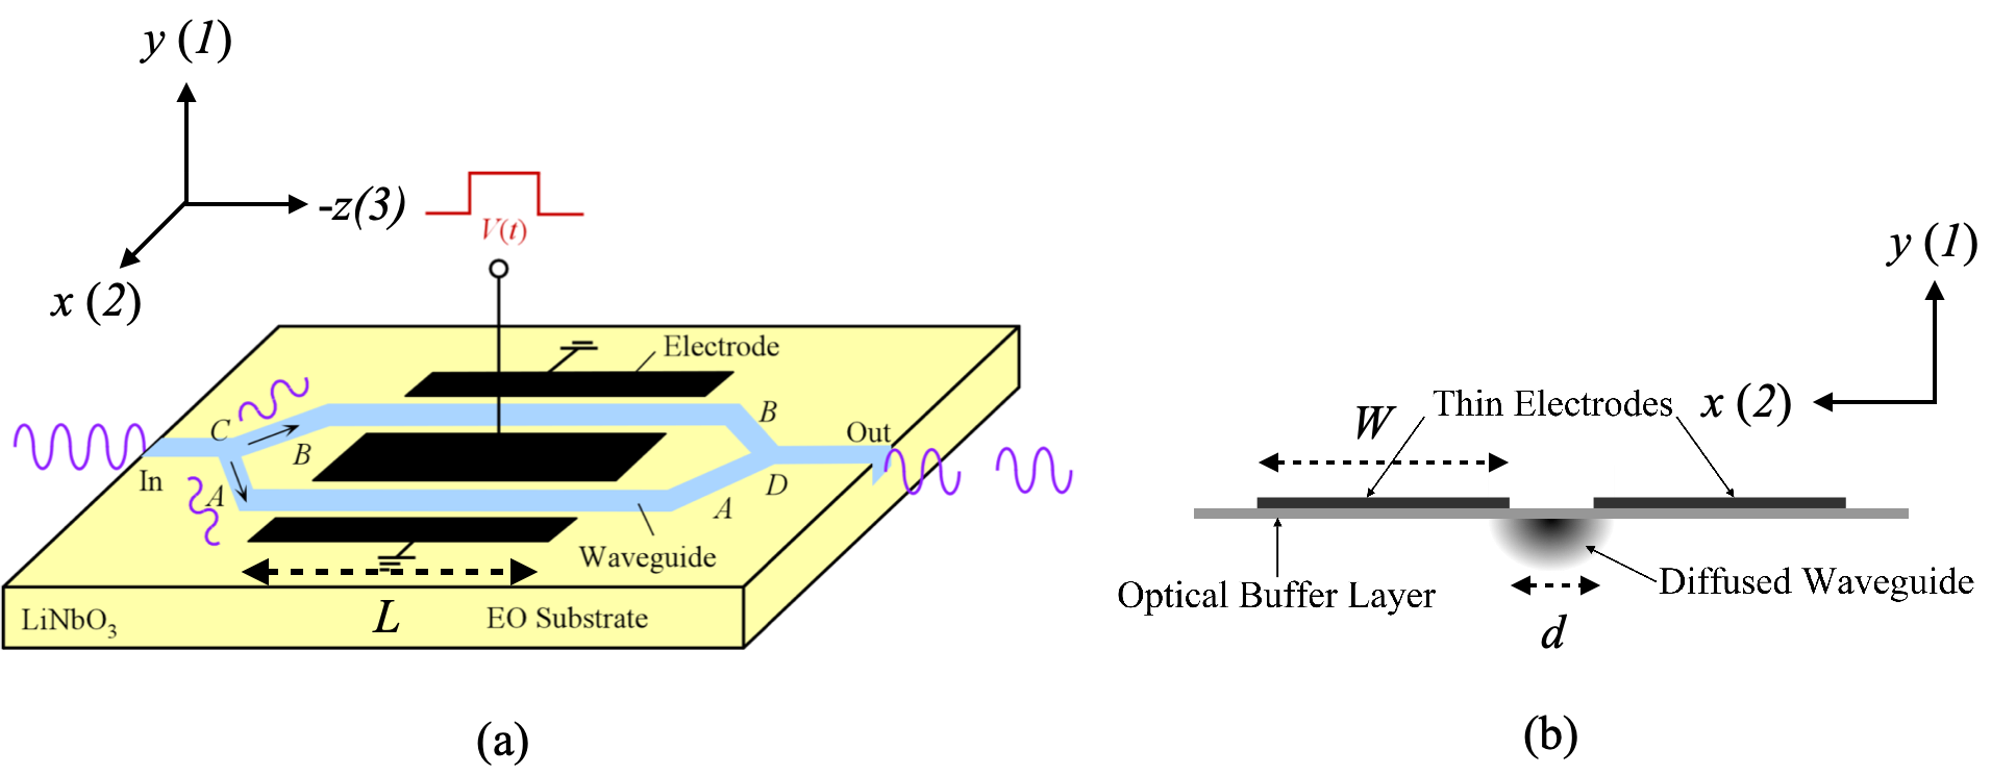


In [4]:
Γ_num1 = 0.6
d_num1 = 5e-6
W_num1 = 10e-6
L_num1 = 20e-3
n_z_num1 = 2.2
n_x_num1 = n_y_num1 = 2.286
r_22_num1 = 6.8e-12 #m/V
λ_0_num1 = 1550e-9

##### 1.A (5%) Calculer la valeur de $V_{\pi}$ pour obtenir un saut de phase de $\pi$ dans un des bras du modulateur.

Pour obtenir une interférence destructive à la sortie, les deux OEM doivent obtenir un retard de phase de $π$. La polarisation TE dans chaque branche possède un champ électrique qui se propage selon 

$$
 E_{out}(z,t) = E_{in} e^{i(ωt - βL)} $$ 
où 

$$ β = k_0 n_{eff} = \frac{2π }{λ_0 }n  $$

Ici, nous avons la polarisation TE qui oscille perpendiculairement à la direction de propagation, donc parallèle à la surface du wafer dans la direction $\hat{x}$. Dans le cas de la modulation par effet Pockels avec recouvrement $Γ$, l'indice de réfraction après application du champ électrique en direction $E_x$ devient

$$ n_x' = n_x + \frac{1}{2}Γn_x^3r_{22}E_x $$

La différence de phase avant et après application du champ électrique dans une branche est alors

$$ Δϕ = β'L - βL = \frac{2πL}{λ_0 } (n' -n) = \frac{2πL}{λ_0 } \left(n_x + \frac{1}{2}Γn_x^3r_{22}E_x - n_x\right) =  \frac{πL  Γn_x^3r_{22} E_x }{λ_0 }$$

Ensuite, le champ électrique généré par les électrodes est inversement proportionnel à la distance qui les sépare.  
$$ Δϕ(V) = \frac{πL  Γn_x^3r_{22} }{λ_0 }\frac{V}{d} $$

C'est la différence de phase dans une branche. Comme nous sommes en configuration push-pull, notre MZI possède une différence de phase entre les deux branches de 
$$ Δϕ_{MZI}(V) = 2⋅Δϕ(V)= \frac{2πL  Γn_x^3r_{22} }{λ_0 }\frac{V}{d} $$

C'est dû au fait que la direction du champ électrique est inversée et que le cristal est anisotrope.

Pour avoir la valeur de $V_π$, on pose simplement $Δϕ = π$ ce qui nous donne.

In [5]:
def calculate_Δϕ(n, r_22, L, λ_0, V, d, Γ):
    """ Calcule le déphasage Δϕ en fonction de la tension appliquée V """
    Δϕ = (np.pi * L * Γ * n**3 * r_22 / λ_0) * (V / d)
    return Δϕ

def calculate_Δϕ_push_pull(n, r_22, L, λ_0, V, d, Γ):
    """ Calcule le déphasage Δϕ en fonction de la tension appliquée V """
    Δϕ = 2* calculate_Δφ(n, r_22, L, λ_0, V, d, Γ)
    return Δϕ

def calculate_V_π(n, r_22, L, λ_0, d, Γ):
    """ Calcule la tension V_π nécessaire pour un déphasage de π """
    V_pi = (λ_0 * d) / (2 * L * Γ * n**3 * r_22)
    return V_pi

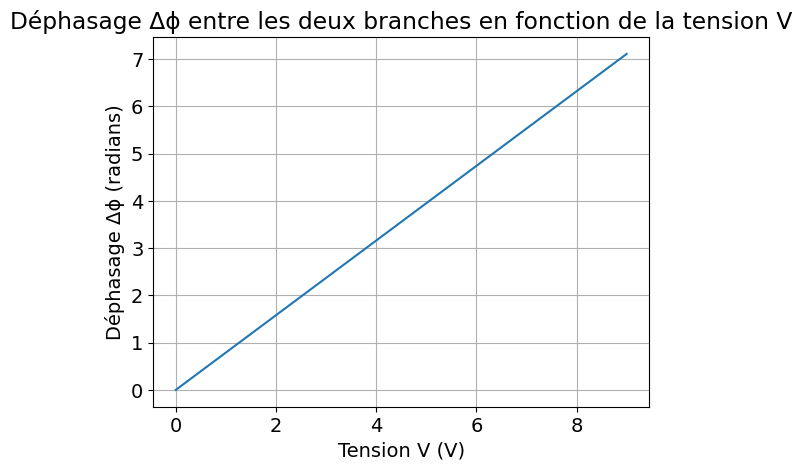

Tension V_π nécessaire pour un déphasage de π: 3.975 V


In [6]:
V_sweep = np.linspace(0, 9, 1000)  
Δϕ_values = calculate_Δϕ_push_pull(n_x_num1, r_22_num1, L_num1, λ_0_num1, V_sweep, d_num1, Γ_num1)

plt.plot(V_sweep, Δϕ_values)
plt.title("Déphasage Δϕ entre les deux branches en fonction de la tension V")
plt.xlabel("Tension V (V)")
plt.ylabel("Déphasage Δϕ (radians)")
plt.grid()
plt.show()




V_π_value = calculate_V_π(n_x_num1, r_22_num1, L_num1, λ_0_num1, d_num1, Γ_num1)
print(f"Tension V_π nécessaire pour un déphasage de π: {V_π_value:.3f} V")


##### 1.B (10%) Tracer la transmittance du modulateur en fonction de la tension appliquée $V$. Assumez des coupleurs parfaits (50-50). Identifiez la position de $V_{pi}$ calculée en (A) sur votre graphique. Quelle est la transmittance à $V_{pi}$?

Les deux champs déphasés de $Δϕ$ sont recombinés à la sortie du MZI, ainsi il y a interférence entre les deux OEM. En recombinant les deux ondes, l'intensité du champ électrique sera multipliée par le cosinus de la différence de phase entre les deux branches. Nous approximons une atténuation le long du MZI nulle.

$$ P_{out} = P_{in} \cos^2(Δϕ/2) $$

On peut aussi écrire la différence de phase entre les deux branches selon le ratio tension sur $V_π$.
$$ P_{out} = P_{in} \cos^2\left( \frac{πV}{2V_π} \right) $$

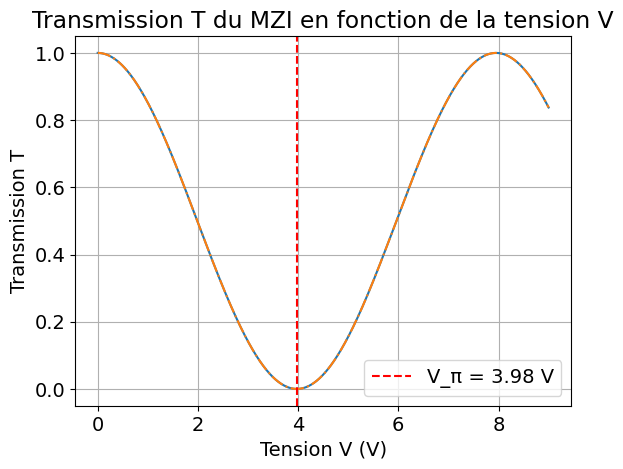

In [7]:
def calculate_transmission_MZI(Δϕ):
    """ Calcule la transmission T en fonction du déphasage Δϕ entre les deux branches """
    T = np.cos(Δϕ/2)**2
    return T

def calculate_transmission_MZI_V(V, V_π):
    """ Calcule la transmission T en fonction de la tension V appliquée """
    Δϕ = (np.pi * V) / (V_π)
    T = calculate_transmission_MZI(Δϕ)
    return T

T_values = calculate_transmission_MZI(Δϕ_values)
T_values_V = calculate_transmission_MZI_V(V_sweep, V_π_value)
plt.plot(V_sweep, T_values)
plt.plot(V_sweep, T_values_V, linestyle='-.')
plt.title("Transmission T du MZI en fonction de la tension V")
plt.axvline(x=V_π_value, color='r', linestyle='--', label=f'V_π = {V_π_value:.2f} V')
#plt.axvline(x=2*V_π_value, color='r', linestyle='--', label=f'2V_π = {2*V_π_value:.2f} V')
plt.legend()
plt.xlabel("Tension V (V)")
plt.ylabel("Transmission T")
plt.grid()
plt.show()

Dans notre cas parfait avec un spliting ratio 50:50, la transmitance à $V_π$ est 

In [8]:
print(f"Transmission T à V = 0: {calculate_transmission_MZI_V(0, V_π_value):.3f}")
print(f"Transmission T à V = V_π: {calculate_transmission_MZI_V(V_π_value, V_π_value)}")

Transmission T à V = 0: 1.000
Transmission T à V = V_π: 3.749399456654644e-33


In [9]:
def calculate_ER(T_max, T_min):
    """ Calcule le rapport d'extinction (ER) en décibels (dB) """
    ER = lin_to_dB(T_max / T_min)
    return ER

def calculate_ER_V(V_π):
    """ Calcule le rapport d'extinction (ER) en décibels (dB) en fonction de la tension V_π """
    T_max = calculate_transmission_MZI_V(0, V_π)
    T_min = calculate_transmission_MZI_V(V_π, V_π)
    ER = calculate_ER(T_max, T_min)
    return ER

print(f"Rapport d'extinction ER en dB: {calculate_ER_V(V_π_value):.2f} dB")

print(f"Cette valeur tend vers l'infini car T_min = 0 lorsque V = V_π. Avec les erreurs numériques, on obtient une valeur très élevée.")

Rapport d'extinction ER en dB: 324.26 dB
Cette valeur tend vers l'infini car T_min = 0 lorsque V = V_π. Avec les erreurs numériques, on obtient une valeur très élevée.


##### 1.C (5%) Vous utilisez un signal électrique avec un composante DC $V_{DC} = 3$ V et une composante AC peak-to-peak $V_{AC,pp} = 1$ V. Quel est le ratio d'extinction $ER$?

In [10]:

V_1 = 3-0.5
V_2 = 3+0.5

T_1 = calculate_transmission_MZI_V(V_1, V_π_value)
T_2 = calculate_transmission_MZI_V(V_2, V_π_value)

T_min_C = min(T_1, T_2)
T_max_C = max(T_1, T_2)

ER_C = calculate_ER(T_max_C, T_min_C)

print(f"Transmission T_1 à V = {V_1} V: {T_1:.3f}")
print(f"Transmission T_2 à V = {V_2} V: {T_2:.3f}")
print(f"Rapport d'extinction ER en dB : {ER_C:.2f} dB")

Transmission T_1 à V = 2.5 V: 0.303
Transmission T_2 à V = 3.5 V: 0.035
Rapport d'extinction ER en dB : 9.39 dB


Faisons une fonction.

In [11]:
def plot_transmission_vs_V_ER(V_DC, V_AC, V_π):
    V_1 = V_DC - V_AC / 2
    V_2 = V_DC + V_AC / 2

    T_1 = calculate_transmission_MZI_V(V_1, V_π)
    T_2 = calculate_transmission_MZI_V(V_2, V_π)

    T_min = min(T_1, T_2)
    T_max = max(T_1, T_2)

    ER_C = calculate_ER(T_max, T_min)

    print(f"Transmission T_1 à V = {V_1:.4f} V: {T_1:.3f}")
    print(f"Transmission T_2 à V = {V_2:.4f} V: {T_2:.3f}")
    print(f"Rapport d'extinction ER en dB : {ER_C:.2f} dB")


    V_sweep_V1_V_2 = np.linspace(V_1, V_2, 1000)
    T_sweep_V1_V_2 = calculate_transmission_MZI_V(V_sweep_V1_V_2, V_π)

    plt.plot(V_sweep_V1_V_2, T_sweep_V1_V_2)
    plt.plot(V_sweep, T_values, linestyle='--', alpha=0.3)    
    plt.title(f"Transmission T du MZI entre V = {V_1:.2f} V et V = {V_2:.2f} V")
    plt.xlabel("Tension V (V)")
    plt.ylabel("Transmission T")
    plt.grid()
    plt.show()

Transmission T_1 à V = 2.5000 V: 0.303
Transmission T_2 à V = 3.5000 V: 0.035
Rapport d'extinction ER en dB : 9.39 dB


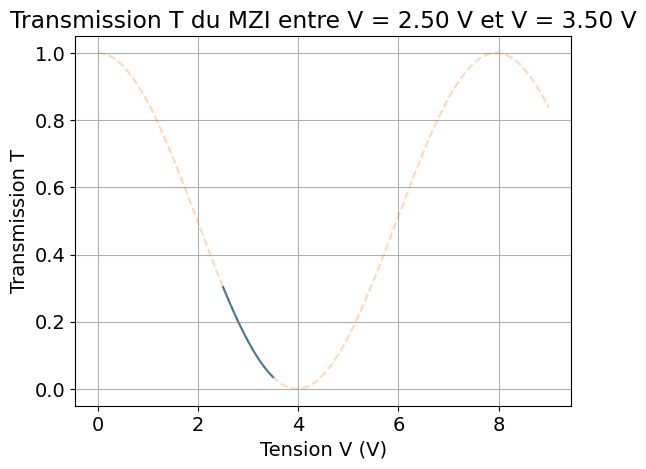

In [12]:
plot_transmission_vs_V_ER(3, 1, V_π_value)

##### 1.D (5%) Trouver une combinaison $V_{DC}$ et $V_{AC}$ vous permettant de maximiser le ratio d'extincition. Quel est le ratio d'extinction à ce moment? Qu'est-ce qui limite $ER$?


Dans le cas où le spliting est parfaitement 50:50, la valeur théorique maximale pour l'extinction ratio est infinie. C'est en prenant en compte que le coefficient de transmission à $V_π$ serait strictement nul, ce qui est loin d'être réalisable au laboratoire. Il faut aussi que les deux tensions soient exactement $V_1 = nV_π$ et $V_2 = (n±1)V_π$. Dans notre cas, il faut que le biais voie à $V_π/2$ et notre $V_{AC,pp} = V_π$.

Transmission T_1 à V = 0.0000 V: 1.000
Transmission T_2 à V = 3.9751 V: 0.000
Rapport d'extinction ER en dB : 324.26 dB


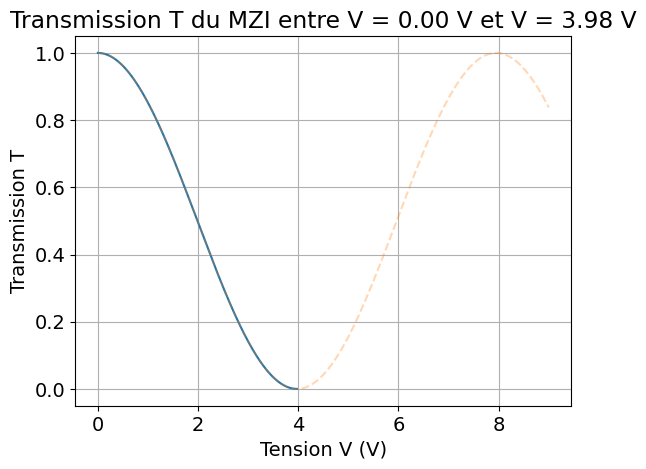

In [13]:
V_DC = V_π_value / 2
V_AC = V_π_value

plot_transmission_vs_V_ER(V_DC, V_AC, V_π_value)

##### 1.E (5%) Quelle tension $V_{DC}$ devez-vous appliquez afin d'opérer autour de la plage linéaire du modulateur?

Ici aussi, pour rester dans la section linéaire de la plage d'opérations, on veut mettre un biais à $V_π/2$. Ensuite, la valeur AC dépend du ratio de linéarité souhaité. Un bon départ serait $V_{ac} = 50\%⋅ V_π$

In [14]:
from IPython.display import clear_output

@interact(V_AC_factor=(0.0, 1.0, 0.01))
def interactive_plot(V_AC_factor=0.5):
    clear_output(wait=True)
    V_DC = V_π_value/2
    V_AC = V_π_value*V_AC_factor
    plot_transmission_vs_V_ER(V_DC, V_AC, V_π_value)

interactive(children=(FloatSlider(value=0.5, description='V_AC_factor', max=1.0, step=0.01), Output()), _dom_c…

##### 1.F (5%) Quel serait l'effet d'utiliser le modulateur en polarisation TM? Cela serait-il problématique pour son opération? Justifier avec un calcul.

La polarisation TM oscille dans la direction $\hat{y}$ et ce mode voit l'indice de réfraction $n_y$. Notre modulateur utilise le ($LiNbO _3$) pour moduler l'indice de réfraction $n_y$ selon 
$ \Delta n_y = -\frac{1}{2}n_y^3 r_{22} E_x$. Ainsi notre champ électrique dans les deux branches est similaire à la polarisation TE, mais le signe moins, vient réduire l'indice de réfraction et non l'augmenter. On observe ainsi une dynamique différente où la vitesse de propagation dans la branche du haut (B) est ralentie et celle du bas (A) est accélérée.

$$ n_y' = n_y - \frac{1}{2}Γn_y^3r_{22}E_x $$

La différence de phase avant et après application du champ électrique est alors

$$ Δϕ = β'L - βL = \frac{2πL}{λ_0 } (n' -n) = \frac{2πL}{λ_0 } \left(n_y - \frac{1}{2}Γn_y^3r_{22}E_x - n_-\right) =  \frac{-πL  Γn_x^3r_{22} E_x }{λ_0 }$$

On remarque que la différence entre la polarisation TE et TM est simplement le signe de la différence de phase entre les deux branches. La différence de phase entre les deux branches sera le double et de signe négatif par rapport à TE. À la recombinaison, l'intensité et la puissance vont suivre la même dynamique.

Tension V_π du modulateur TM: 3.975 V


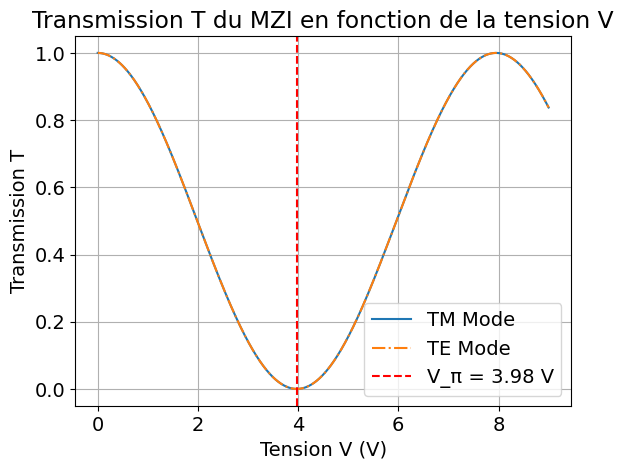

In [15]:
Δϕ_TM_1_arm = -calculate_Δϕ(n_y_num1, r_22_num1, L_num1, λ_0_num1, V_sweep, d_num1, Γ_num1)

T_TM = calculate_transmission_MZI(2*Δϕ_TM_1_arm)

V_π_TM = calculate_V_π(n_y_num1, r_22_num1, L_num1, λ_0_num1, d_num1, Γ_num1)
print(f"Tension V_π du modulateur TM: {V_π_TM:.3f} V")

plt.plot(V_sweep, T_TM, label='TM Mode')
plt.plot(V_sweep, T_values, linestyle='-.', label='TE Mode')
plt.title("Transmission T du MZI en fonction de la tension V")
plt.axvline(x=V_π_TM, color='r', linestyle='--', label=f'V_π = {V_π_value:.2f} V')
plt.legend()
plt.xlabel("Tension V (V)")
plt.ylabel("Transmission T")
plt.grid()
plt.show()

Par contre, ici, j'ai assumé que le mode TE et le mode TM étaient guidés par la même manière. Ce n'est souvent pas vrai. Les guides d'ondes sont souvent asymétriques et la propagation du mode TM dans un modulateur optimisé en mode TE ne marcherait surement pas très bien. Selon la géométrie du guide d'onde, il peut y avoir un recouvrement différent. Si $Γ_{TM}$ change, la tension $V_{π, TM}$ sera aussi différente.

##### 1.G (5%) Expliquez qualitativement et dans vos mots quel serait l'effet d'utiliser un coupleur imparfait pour le Mach-Zehnder? C'est à dire que la répartition de la puissance entre le bras $A$ et le bras $B$ ne serait plus 50-50.

Pour qu'à la recombinaison, il n'y ait aucune lumière, l'interférence destructive a besoin d'une différence de phase de $π$ mais aussi de deux ondes de même amplitude. Si dans notre cas le splitting ratio n'est pas de $50:50$, mais plutôt de $α:1-α$. On obtiens à la sortie, la recombinaison de deux champ d'amplitude 
$$ E_A = \sqrt{α}E_{in} \quad\Bigg|\quad E_B = \sqrt{1-α}E_{in}  $$
La recombinaison après propagation dans les deux bras (assumant un coefficient du coupleur de recombinaison parfait) est la suivante. 

$$ E_{out} = \frac{E_{in}}{\sqrt{2}} [\sqrt{α} e^{iϕ_A} + \sqrt{1-α}e^{iϕ_B} ] $$
Ce qui donne une puissance à la sortie

$$ P_{out} = E_{out}^2 = \frac{P_{in}}{2}[1+2\sqrt{α(1-α)}\cos(Δϕ)]
$$ 

Pour vérifier, si l'on applique $α=50\%$ comme précédemment, on retrouve
$$ T  = \frac{P_{out}}{P_{in}} = \frac{1}{2}[1+2\sqrt{0.5(1-0.5)}\cos(Δϕ)] = \frac{2}{2}\cos^2{Δϕ/2}  = \cos^2{\left( \frac{Δϕ}{2} \right)}
$$ 

On remarque que le $V_π$ n'est pas affecté, mais que $T_{min}$ et $T_{max}$ donc l'$ER$ seront différents. 

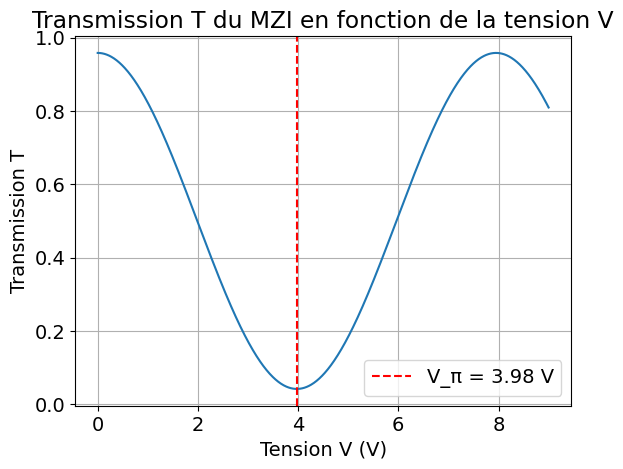

In [16]:
def calculate_transmission_MZI_splitting_ratio(Δϕ, α):
    """ Calcule la transmission T en fonction du déphasage Δϕ entre les deux branches et du ratio de division α """
    T = 0.5 * (1 + 2 * np.sqrt(α * (1 - α)) * np.cos(Δϕ))
    return T

α_num1 = 0.3
T_values_α = calculate_transmission_MZI_splitting_ratio(Δϕ_values, α_num1)

plt.plot(V_sweep, T_values_α)
plt.title("Transmission T du MZI en fonction de la tension V")
plt.axvline(x=V_π_value, color='r', linestyle='--', label=f'V_π = {V_π_value:.2f} V')

plt.legend()
plt.xlabel("Tension V (V)")
plt.ylabel("Transmission T")
plt.grid()
plt.show()

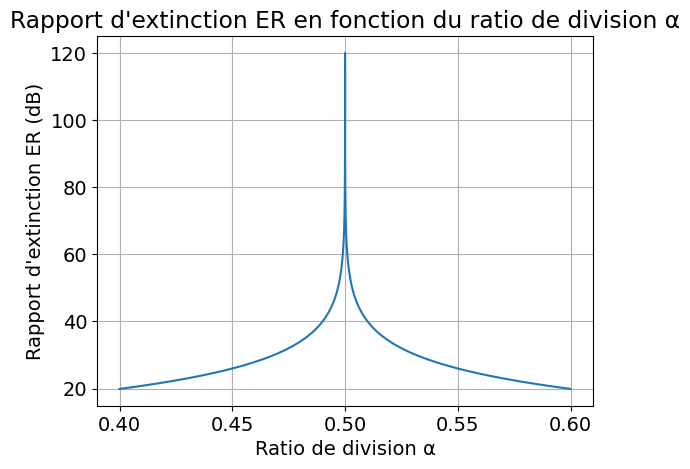

L'ER pour α=0.5 tend vers l'infini car T_min = 0. Et est limité par la précision numérique.


In [17]:
α_sweep = np.linspace(0.4, 0.6, 100000)
T_α_sweep_min = calculate_transmission_MZI_splitting_ratio(np.pi, α_sweep)
T_α_sweep_max = calculate_transmission_MZI_splitting_ratio(0, α_sweep)

# calculate ER as a function of α
ER_α = lin_to_dB(T_α_sweep_max / T_α_sweep_min)
plt.plot(α_sweep, ER_α)
plt.title("Rapport d'extinction ER en fonction du ratio de division α")
plt.xlabel("Ratio de division α")
plt.ylabel("Rapport d'extinction ER (dB)")
plt.grid()
plt.show()

print(f"L'ER pour α=0.5 tend vers l'infini car T_min = 0. Et est limité par la précision numérique.")

### Question 2 - Photodétecteur (60%)

In [18]:
#reset_globals_variables()
### données problèmes 2
# Laser
I_th_num2 = 10e-3  # A
η_slope_num2 = 0.3  # W/A
τ_p_num2 = 10e-12  # s
τ_m_num2 = 10e-12  # s
V_p_num2 = 1e-16  # m^3
B_num2 = 1.5e-20  # m^-1
n_g_laser_num2 = 4
λ_0_num2 = 900e-9  # m

# fibre
α_fibre_num2 = 1  # dB/km
lenght_fiber_max = 20 # km 

# photodétecteur

I_d_num2 = 2e-9  # A
r_num2 = 0.1e-3  # m
D_e_num2 = 3e-4  # m^2/s
l_p_num2 = 1e-6  # m
W_i_num2 = 20e-6  # m
V_r_num2 = 60  # V
η_i_num2 = 0.95
α_i_num2 = 3e4  # m^-1
α_p_num2 = 10 * α_i_num2  # m^-1
n_pin_num2 = 3.5
v_d_e_num2 = 5e4  # m/s
v_d_h_num2 = 5e4  # m/s
R_L_num2 = 50  # Ohm
surface_pin_num2 = np.pi * r_num2**2  # m^2
surface_mode_num2 = 1e-6  # m^2

Considérez le système de transmission présenté à la figure ci-bas en (a). Vous disposez d'une longueur fibre illimitée avec des pertes de propagation de  $\alpha_{fibre}$ = 1 dB/km. Le faisceau incident sur le photodétecteur (en sortie de la fibre) à une aire de 1 mm $^2$ . Le photodétecteur $ pin $ est montré en détail sur la figure ci-bas en (b). Il n'y a pas de recouvrement anti-reflet à l'entrée. Approximez que tous les électrons générés dans la zone $ p $ atteignent la zone intrinsèque. Vous devez considérer l'absorption dans la zone $ p $ dans votre analyse. Tout les photoélecrons atteignant la zone $n$ participent au photocourant. Votre système est opéré à $T = 300$ K.

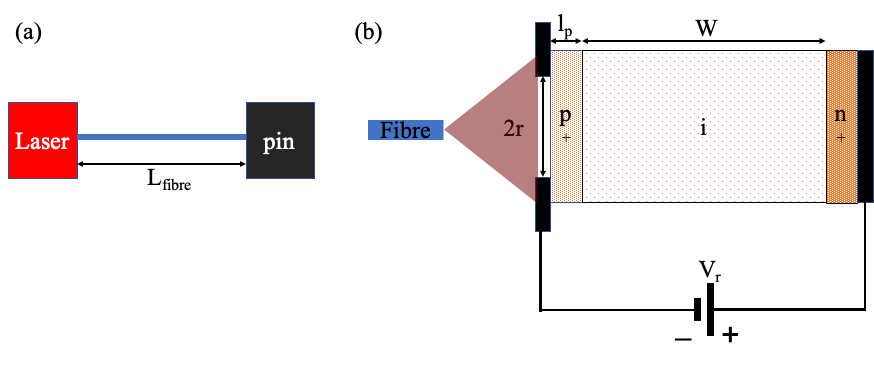

**Les paramètres de la diode laser sont:**

- Courant de seuil: $I_{th} = 10$ mA
- Efficacité de pente: $\eta_{slope} = \frac{dP}{dI} = 0.3$ mW/mA
- Temps de vie des photons: $\tau_p = 10$ ps
- Temps de vie du au couplage (miroirs): $\tau_m = 10$ ps
- Volume du mode optique: $V_p = 1 \times 10^{-16}$ m $^3$
- Gain différentiel: $B = 1.5 \times 10^{-20}$ $m^{-1}$
- Indice de groupe: $n_g = 4$
- Longueur d'onde d'émission: $\lambda_0 = 900$ nm

**Les paramètres du photodétecteur sont:**

- Courant d'obscurité: $I_d = 2$ nA
- Rayon de l'ouverture à l'entrée du $pin$: $r = 0.1$ mm
- Coefficient de diffusion des électrons dans la zone $p$: $D_e = 3 \times 10^{-4}$ m $^2/$ s
- Longueur de la zone $p$ : $l_p = 1~\mu$ m
- Longueur de la zone intrinsèque: $W_i = 20~\mu$ m
- Tension d'opération en polarisation inverse: $V_r = 60$ V
- Efficacité quantique interne: $\eta_i = 0.95$
- Coefficient d'absorption dans la zone intrinsèque: $\alpha_i = 3 \times 10^4$ m $^{-1}$
- Coefficient d'absorption dans la zone $p$: $\alpha_p = 10 \times \alpha_i$
- Indice de réfraction: $n = 3.5$
- Vitesse de dérive des porteurs: $v_{d,e} = v_{d,h} = 5 \times 10^4$ m/s
- Résistance de charge: $R_L = 50~\Omega$

Dans l'image du montage, la fibre n'est pas collée directement sur la pin, il y a un interface fibre→air, de la dispersion, air→pin. Il y a un coefficient de réflexion à chaque interface, et je vais assumer que les effets de cavité sont négligeables et ne vais pas considérer la 2ᵉ réflexion. Il faudrait aussi considérer l'effet de l'angle d'incidence entre l'air et la pin. Pour des raisons de simplicité, je vais approximer que tous les rayons arrivent à incidence normale. Le coefficient de transmission à chaque interface entre un milieu 1 et un 2 est alors
$$ T_{1→2} = \frac{(2n_1)^2}{(n_1 + n_2)^2} $$

Je vais aussi assumer que l'indice de réfraction de la fibre est d'environ 1.45, Cette valeur peut varier si différents designs de fibre sont utilisés. Je suppose aussi que le milieu entre la fibre et la pin (l'interstice) est de l'air d'indice $n_{interstice} = 1$.

In [19]:
n_fiber_num2 = 1.45
n_interstice_num2 = 1


Il est mentionné que le faisceau laser dans l'air possède une surface de $1 \rm{\ mm}^2$ ("sur le photodétecteur"). Nous avons probablement une fibre de silice monomode (standard pour des pertes de 1 dB/km), le profil d'intensité de la lumière est probablement gaussien (approximation). Il n'existe pas de concept comme surface de mode (aire du faisceau). Je vais assumer que le correcteur veut dire mode field diameter MFD. C'est le diamètre du mode où la puissance par rapport au maximum est de $1/e^2$.
https://en.wikipedia.org/wiki/Mode_field_diameter

Ainsi, une surface de $ 1×10^{-6} \ \rm{m^2} $ donne un MFD de 
$$ Aire = \frac{π D^2}{4} = \frac{π MFD^2}{4} 
$$  
$$ MFD = \sqrt{\frac{4⋅Aire}{π}} =  \sqrt{\frac{4⋅1×10^-6}{π}} = 1.12 \rm{\ mm}
 $$

Maintenant que nous connaissons le $MFD = 2w_0$ d'une gaussienne, on peut calculer la puissance qui passera à travers le trou de rayon $r=0.1 \rm{\ mm}$ avec une intégrale d'overlap. On vient intégrer la densité de puissance de notre gaussienne seulement entre 0 et $r$.

Pour un faisceau gaussien avec profil d'intensité 
$$I(ρ) = I_0 \exp(-2r^2/w_0^2)$$

La puissance totale de ce faisceau est 
$$P_{total} = 2π I_0 \int_0^{∞} \exp\left(-\frac{2ρ^2}{w_0^2}\right) ρ \, dρ = \frac{π I_0 w_0^2}{2}$$

et la puissance transmise à travers un cercle de rayon $r$ est alors:
$$P_{transmise} = 2\pi I_0 \int_0^{r} \exp\left(-\frac{2\rho^2}{w_0^2}\right) \rho \, d\rho = \frac{\pi I_0 w_0^2}{2} \left(1 - e^{-2r^2/w_0^2}\right)$$

Et pour finir, le coefficient de transmission est simplement
$$T = \frac{P_{transmise}}{P_{total}} = 1 - \exp\left(-\frac{2r^2}{w_0^2}\right)$$

In [20]:
def calculate_optical_transmission(n_1, n_2):
    """ Calcule la transmission optique T entre deux milieux d'indices n_1 et n_2 """
    T = (4 *  n_1*n_2) / (n_1 + n_2)**2
    return T

def calculate_loss_fiber(α, L):
    """ Calcule la perte optique en fonction du coefficient d'absorption α [dB/km] et de la longueur L [km] """
    Loss_dB = α*L
    Loss_lin = dB_to_lin(-Loss_dB)
    return Loss_lin

def calculate_transmission_hole_gaussian(r, w_0):
    """ 
    Calcule la fraction de puissance d'un faisceau gaussien qui passe à travers une ouverture circulaire.
    """
    T = 1 - np.exp(-2 * r**2 / w_0**2)
    return T

##### 2.A (20%) Quelle est la longueur maximale de fibre que vous pouvez utiliser sans avoir besoin d'amplification si le laser émet 10 mW de puissance, tout en gardant un ratio signal-sur-bruit ($SNR$) supérieur ou égal à 10?

** Suggestion: écrire une fonction qui  calcule le photocourant généré en fonction de la puissance incidente sur le photodétecteur **

Ensuite, pour avoir l'efficacité d'absorption de la diode, on doit prendre en compte la fraction de photons qui sont absorbés dans la zone active, c'est-à-dire *p* et  *i*. La fraction de photons qui passeront à travers ces deux zones sans être absorbés seront perdues. Ainsi, l'efficacité d'absorption est 
$$ η_{abs} = 1 - e^{-α_p l_p - α_iW_i}$$

On doit calculer le courant généré par une certaine puissance qui pénètre dans la PIN. L'efficacité quantique interne $η_i$ nous donne le nombre d'électrons générés par photon absorbé dans la cavité. Ainsi, pour avoir le courant $I_{ph}$ généré par une puissance optique à l'intérieur de la cavité $P_{abs} = η_{abs}P_{int}$, on doit utiliser la formule suivante.

$$  η_i = \frac{I_{ph}/e}{P_{abs}/hν} = \frac{I_{ph}hc}{eP_{abs}λ}  $$
$$ I_{ph} = \frac{η_i e P_{abs} λ}{hc} = \frac{η_i e η_{abs}P_{int} λ}{hc} \ [\rm{A}] $$



In [21]:
def calculate_photocurrent(P_in, η_i, η_abs,  λ_0):
    """ Calcule le courant photocourant I_ph en fonction de la puissance incidente P_in, de l'efficacité quantique η_i et de la longueur d'onde λ_0 """
    h = cte.h
    c = cte.c
    q = cte.e
    I_ph = (η_i * q * η_abs * P_in) / (h * c / λ_0)
    return I_ph

In [22]:
def calculate_η_abs(α_p, l_p, α_i, W_i):
    """ Calcule l'efficacité d'absorption η_abs en fonction des coefficients d'absorption et des dimensions de la région de détection """
    η_abs = 1 - np.exp(-α_p * l_p - α_i * W_i)
    return η_abs

η_abs_num2 = calculate_η_abs(α_p_num2, l_p_num2, α_i_num2, W_i_num2)
print(f"Efficacité d'absorption η_abs: {η_abs_num2:.3f}")
print(f"L'éfficacité interne η_i: {η_i_num2:.3f}")

Efficacité d'absorption η_abs: 0.593
L'éfficacité interne η_i: 0.950


Les pertes le long de la communication sont calculées avec le coefficient de transmission $T$  à chaque étape. Autrement-dit,  propagation fibre → air → trou → SC

In [23]:
MFD =  np.sqrt(4 * surface_mode_num2 / np.pi)  # rayon du faisceau gaussien
w_0 = MFD / 2

print(f"w_0 = {w_0*1000:.3f} mm")

T_hole = calculate_transmission_hole_gaussian(r_num2, w_0)
T_hole_dB = lin_to_dB(T_hole)


T_hole_simple_surface_ratio = (np.pi * r_num2**2) / surface_mode_num2
print(f"Transmission power with surface ratio: {T_hole_simple_surface_ratio*100:.3f} % = {lin_to_dB(T_hole_simple_surface_ratio):.3f} dB")
print(f"Transmission power through the hole (gaussian): {T_hole*100:.3f} % = {T_hole_dB:.3f} dB")

w_0 = 0.564 mm
Transmission power with surface ratio: 3.142 % = -15.029 dB
Transmission power through the hole (gaussian): 6.090 % = -12.154 dB


Si l'on veut calculer les pertes à travers le trou avec le mode gaussien ou avec un mode parfaitement rond. On peut décommenter la prochaine ligne. 

In [24]:
#T_hole = T_hole_simple_surface_ratio


T_interface_fiber_air = calculate_optical_transmission(n_fiber_num2, n_interstice_num2)
T_interface_fiber_air_dB = lin_to_dB(T_interface_fiber_air)
print(f"Transmission at fiber/air interface: {T_interface_fiber_air*100:.3f} % = {T_interface_fiber_air_dB:.3f} dB")

T_interface_air_pin = calculate_optical_transmission(n_interstice_num2, n_pin_num2)
T_interface_air_pin_dB = lin_to_dB(T_interface_air_pin)
print(f"Transmission at air/pin interface: {T_interface_air_pin*100:.3f} % = {T_interface_air_pin_dB:.3f} dB")

print(f"Transmission power through the hole: {T_hole*100:.3f} % = {lin_to_dB(T_hole):.3f} dB")


Transmission at fiber/air interface: 96.626 % = -0.149 dB
Transmission at air/pin interface: 69.136 % = -1.603 dB
Transmission power through the hole: 6.090 % = -12.154 dB


J'assume ici que le couplage entre le laser et la fibre est parfait. Il faudrait avoir plus d'informations pour pouvoir calculer cette perte. 


Perte de puissance optique dans la fibre pour 0.0020000200002000023 km: -0.002 dB
Perte totale de puissance optique pour 0.0020000200002000023 km de fibre: -13.908 dB


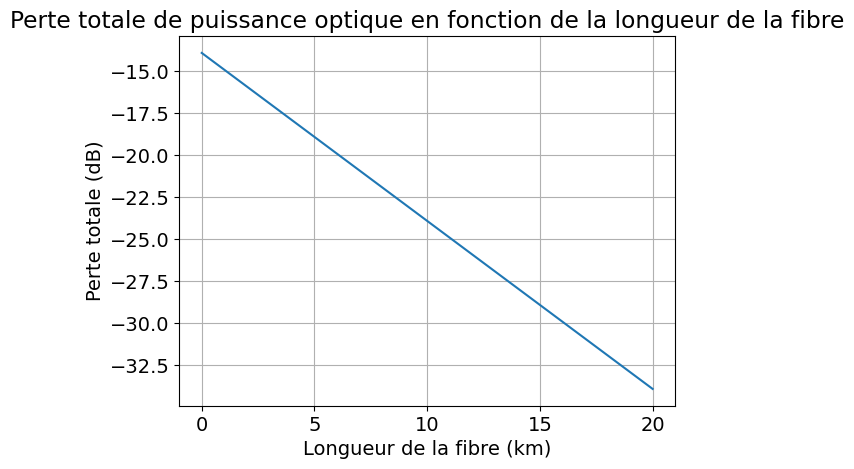

In [25]:
Lengh_fibre_num2_km = np.linspace(0, lenght_fiber_max, 100000)  # km


Loss_fibre_num2 = calculate_loss_fiber(α_fibre_num2, Lengh_fibre_num2_km)
print(f"Perte de puissance optique dans la fibre pour {Lengh_fibre_num2_km[10]} km: {lin_to_dB(Loss_fibre_num2[10]):.3f} dB")

Total_power_loss = Loss_fibre_num2 * T_interface_fiber_air * T_interface_air_pin * T_hole

print(f"Perte totale de puissance optique pour {Lengh_fibre_num2_km[10]} km de fibre: {lin_to_dB(Total_power_loss[10]):.3f} dB")
plt.plot(Lengh_fibre_num2_km, lin_to_dB(Total_power_loss))
plt.title("Perte totale de puissance optique en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Perte totale (dB)")
plt.grid()
plt.show()



Pour toutes les longueurs de fibre, on calcule ainsi la puissance à l'intérieur de la cavité, sachant que la puissance émise est de $10 \rm{\ mW}$.

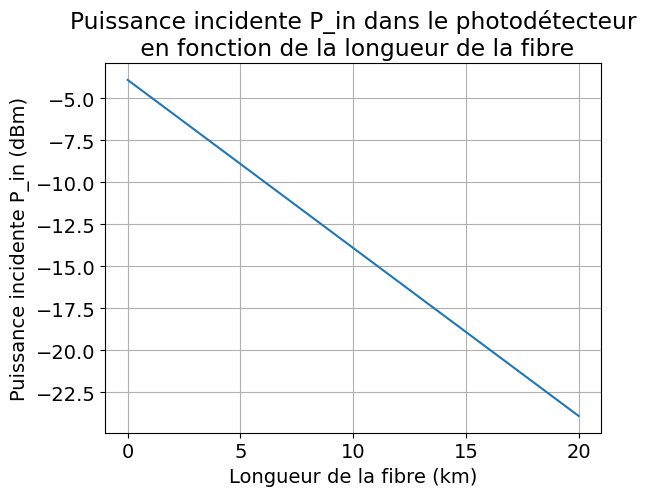

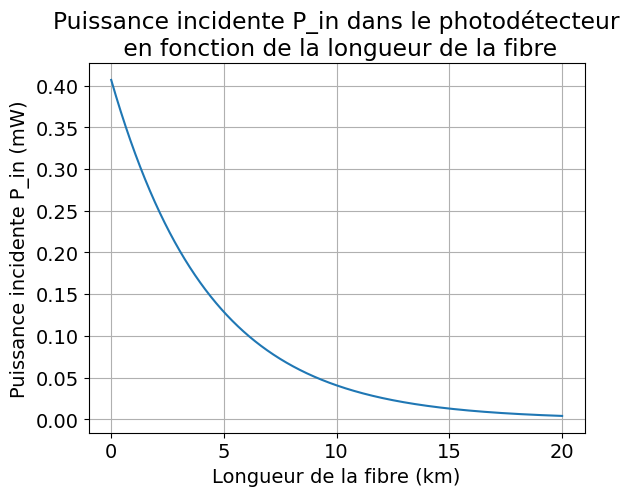

Courant photocourant I_ph pour 10 mW incident et 0 km de fibre: 166.485 μA


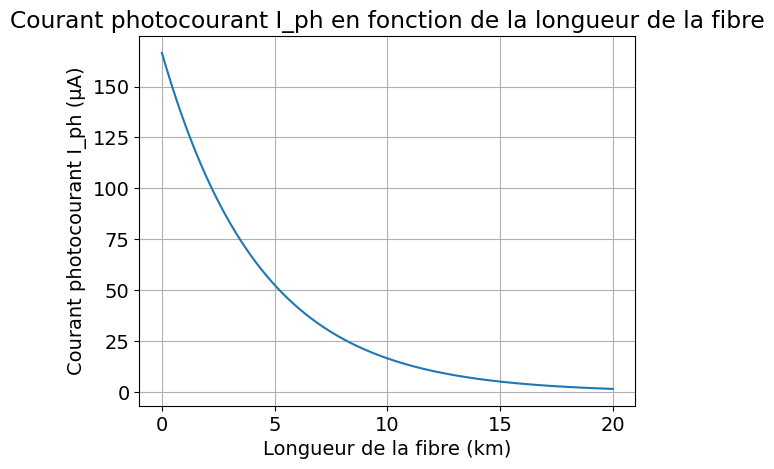

In [26]:
# Calcul de I_ph pour une puissance incidente de 10 mW
P_laser_num2 = 10e-3  # W

P_into_pin_num2 = P_laser_num2 * Total_power_loss

plt.plot(Lengh_fibre_num2_km, lin_to_dB(P_into_pin_num2 * 1e3))
plt.title("Puissance incidente P_in dans le photodétecteur\n en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Puissance incidente P_in (dBm)")
plt.grid()
plt.show()

plt.plot(Lengh_fibre_num2_km, P_into_pin_num2 * 1e3)
plt.title("Puissance incidente P_in dans le photodétecteur\n en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Puissance incidente P_in (mW)")
plt.grid()
plt.show()


photocurrent_num2 = calculate_photocurrent(P_into_pin_num2, η_i_num2, η_abs_num2, λ_0_num2)
print(f"Courant photocourant I_ph pour 10 mW incident et 0 km de fibre: {photocurrent_num2[0]*1e6:.3f} μA")

plt.plot(Lengh_fibre_num2_km, photocurrent_num2 * 1e6)
plt.title("Courant photocourant I_ph en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Courant photocourant I_ph (μA)")
plt.grid()
plt.show()

Finalement, pour calculer le SNR, nous utilisons la formule du livre qui donne le SNR en fonction du dark current $I_d$ et la bande passante de la photodiode $B$. 
$$ SNR = \frac{I_{ph}^2}{2e (I_d + I_{ph})B  + \frac{4 k_B T⋅B}{R_L}   } 
$$ 

La bande passante $B$ est celle d'un filtre passe-bas de premier ordre $RC$.
$$ B = \frac{1}{4R_LC_j}$$
La résistance de load $R_L$ est de $50Ω$. La capacitance de jonction $C_j$ est celle générée entre les deux zones dopées de notre PD. Celle-ci est calculée comme ayant un condensateur plan.
$$ C_j = \frac{ϵ_0ϵ_r A_{détecteur}}{W_i} $$
où la permittivité relative de notre matériau est $\sqrt{ϵ_r} = n $ 

J'assume ici que l'air du détecteur est strictement celle de la surface exposée, donc un cercle avec un rayon de 0.1mm. Le stack semi-conducteur est sûrement plus en forme de carré avec des dimensions ici inconnues.

In [27]:
def calculate_SNR(I_ph, I_d, B, R_L, Temp=300):
    """ Calcule le rapport signal sur bruit (SNR) du photodétecteur """
    e = cte.e
    k_B = cte.k
    noise_shot = 2 * e * (I_d + I_ph) * B
    noise_thermal = (4 * k_B * Temp * B) / R_L
    SNR = I_ph**2 / (noise_shot + noise_thermal)
    return SNR

def calculate_capacitance_pin(n, A_det, W_i):
    """ Calcule la capacitance C_j du photodétecteur PIN """
    ϵ_0 = cte.epsilon_0
    C_j = (ϵ_0 * n**2 * A_det) / W_i
    return C_j

def calculate_bandwidth_pin(C_j, R_L):
    """ Calcule la bande passante f_c du photodétecteur PIN """
    B = 1 / (2 * np.pi * R_L * C_j)
    return B

Calculons maintenant le SNR pour chaque longueur de fibre.

Capacitance du photodétecteur PIN: 0.170 pF
Bande passante du photodétecteur PIN: 18.683 GHz


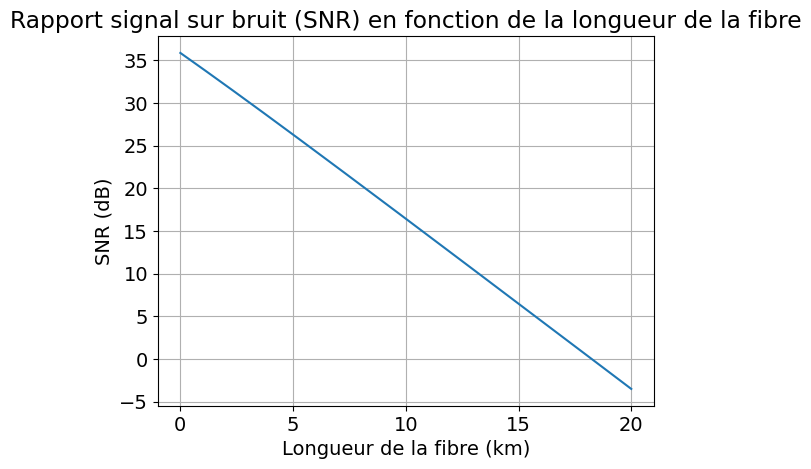

In [28]:
capacitance_num2 = calculate_capacitance_pin(n_pin_num2, surface_pin_num2, W_i_num2)
frequency_B_num2 = calculate_bandwidth_pin(capacitance_num2, R_L_num2)

print(f"Capacitance du photodétecteur PIN: {capacitance_num2*1e12:.3f} pF")
print(f"Bande passante du photodétecteur PIN: {frequency_B_num2*1e-9:.3f} GHz")

SNR_num2 = calculate_SNR(photocurrent_num2, I_d_num2, frequency_B_num2, R_L_num2)

plt.plot(Lengh_fibre_num2_km, 10 * np.log10(SNR_num2))
plt.title("Rapport signal sur bruit (SNR) en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("SNR (dB)")
plt.grid()
plt.show()

La longueur de la fibre qui donne un SNR de 10 dB est alors

In [29]:
# find the length of fibre where SNR drops below 10 dB
# make sure no error occurs if SNR never drops below 10 dB
try:
	length_fibre_SNR_10dB = Lengh_fibre_num2_km[np.where(10 * np.log10(SNR_num2) < 10)[0][0]]
	print(f"Longueur de fibre où le SNR tombe en dessous de 10 dB: {length_fibre_SNR_10dB:.3f} km")
except IndexError:
	print("Le SNR ne tombe jamais en dessous de 10 dB pour les longueurs de fibre considérées.")

Longueur de fibre où le SNR tombe en dessous de 10 dB: 13.239 km


##### 2.B (5%) Quelle est la responsivité du photodétecteur? Quelle est la puissance équivalente au bruit $NEP$?

La responsivity $ℜ$ est le ratio entre la puissance optique arrivant sur la PD et le courant généré.

$$ ℜ = T_{air/pin}⋅ T_{trou} ⋅η_{abs} ⋅η_{i} \cdot \frac{q λ}{h c}$$

In [30]:
def calculate_responsivity(T_air_to_PD, T_hole, η_abs, η_i, λ_0):
    """ Calcule la responsivité ℜ du photodétecteur """
    h = cte.h
    c = cte.c
    q = cte.e
    ℜ = T_air_to_PD * T_hole * η_abs * η_i * (q * λ_0) / (h * c)
    return ℜ

ℜ_num2 = calculate_responsivity(T_interface_air_pin, T_hole, η_abs_num2, η_i_num2, λ_0_num2)
print(f"Responsivité ℜ du photodétecteur: {ℜ_num2:.3f} A/W")

def calculate_photocurrent_from_ℜ(P_in, ℜ):
    """ Calcule le courant photocourant I_ph en fonction de la puissance incidente P_in et de la responsivité ℜ """
    I_ph = ℜ * P_in
    return I_ph

Responsivité ℜ du photodétecteur: 0.017 A/W


Pour faire une vérification que notre fonction est bien la bonne et que la technique donne bien les mêmes résultats qu'avant, comparons le courant généré pour chaque longueur de fibre.

Vérification du courant photocourant I_ph pour 10 mW d'entrée dans la fibre: 166.485 μA
Différence relative entre les deux méthodes: 0.000000 %


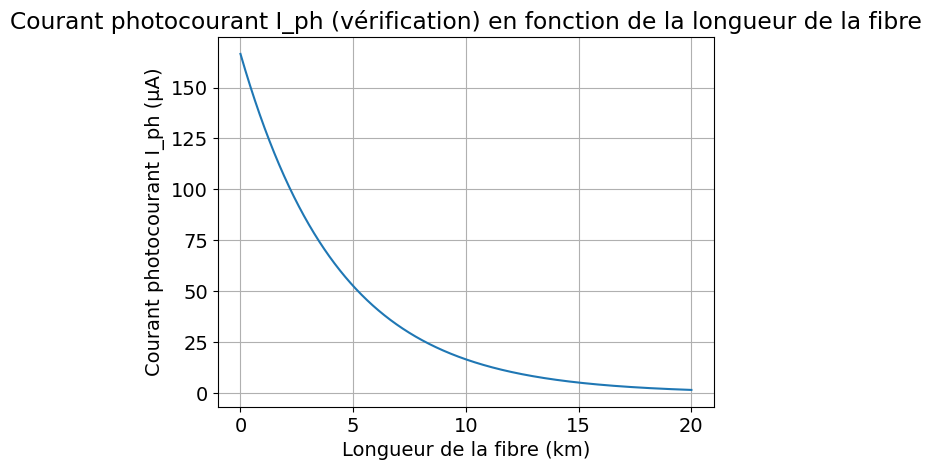

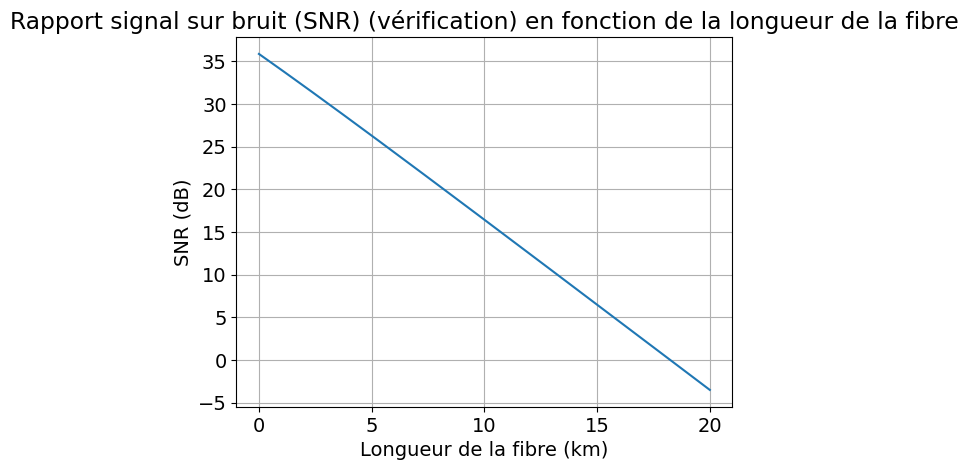

In [31]:
P_input_fibre = 10e-3 # W

P_output_fibre = P_input_fibre*Loss_fibre_num2
P_air = P_output_fibre*T_interface_fiber_air

photocurrent_verif_num2 = calculate_photocurrent_from_ℜ(P_air, ℜ_num2)
print(f"Vérification du courant photocourant I_ph pour 10 mW d'entrée dans la fibre: {photocurrent_verif_num2[0]*1e6:.3f} μA")
print(f"Différence relative entre les deux méthodes: {abs(photocurrent_verif_num2 - photocurrent_num2).max()/photocurrent_num2.max()*100:.6f} %")
plt.plot(Lengh_fibre_num2_km, photocurrent_verif_num2 * 1e6)
plt.title("Courant photocourant I_ph (vérification) en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("Courant photocourant I_ph (μA)")
plt.grid()
plt.show()

SNR_verif_num2 = calculate_SNR(photocurrent_verif_num2, I_d_num2, frequency_B_num2, R_L_num2)
plt.plot(Lengh_fibre_num2_km, 10 * np.log10(SNR_verif_num2))
plt.title("Rapport signal sur bruit (SNR) (vérification) en fonction de la longueur de la fibre")
plt.xlabel("Longueur de la fibre (km)")
plt.ylabel("SNR (dB)")
plt.grid()
plt.show()

Ensuite le Noise Equivalent Power (NEP) se calcul avec la formule suivante:
$$ NEP = \frac{i_{noise}}{ℜ}  \quad \left[\rm{\frac{W}{\sqrt{Hz}}}\right]$$
La densité spectral du bruit est comme définit plus haut avec le shot noise et le thermal noise selon
$$ i_{noise} = \sqrt{\frac{4k_b T}{ R_L} + 2qI_d}  $$


In [32]:
def calculate_NEP_formula(ℜ, I_d, R_L, T=300):
    """ Calcule le NEP du photodétecteur """
    h = cte.h
    c = cte.c
    q = cte.e
    k_B = cte.k

    i_noise = np.sqrt((4 * k_B * T) / R_L + 2 * q * I_d)
    NEP = i_noise / ℜ
    return NEP, i_noise

NEP_formula_num2, i_noise_num2 = calculate_NEP_formula(ℜ_num2, I_d_num2, R_L_num2)
print(f"NEP du photodétecteur (formule): {NEP_formula_num2*1e9:.3f} nW/√Hz")


#NEP = 1/ℜ_num2 * np.sqrt(2 * cte.e * (I_d_num2 + i_noise_num2))
#print(f"NEP du photodétecteur: {NEP*1e12:.3f} pW/√Hz")

NEP du photodétecteur (formule): 1.056 nW/√Hz


Je vais sweeper les puissance et regarder à partir de quand le SNR en linéaire deviens égal à 1 (ou un SNR de 0 dB). Je prend la puissance dans l'air avant de toucher la PIN. Ainsi cela comprend les pertes du au trou et à l'interface.

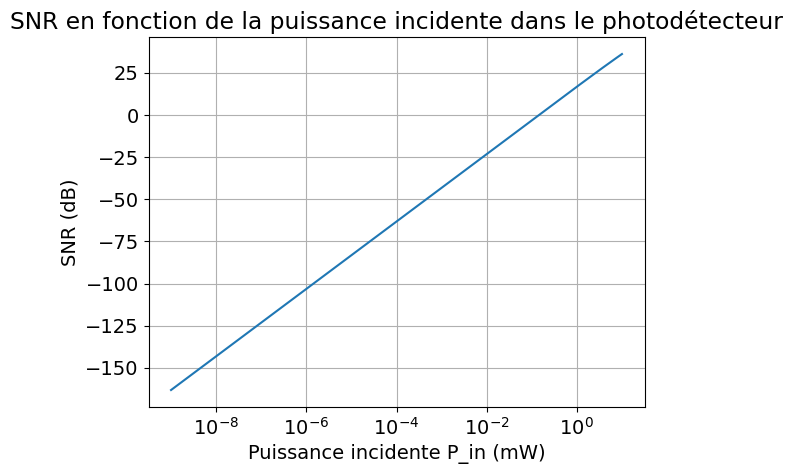

Puissance incidente dans le photodétecteur pour un SNR de 1 [linéaire]: 144590.146 nW
NEP du photodétecteur: 1057.830 pW/√Hz


In [33]:
input_power_NEP_num2 = np.linspace(1e-12, 10e-3, 1000000)  # W

photocurrent_NEP_num2 = calculate_photocurrent_from_ℜ(input_power_NEP_num2, ℜ_num2)

SNR_NEP_num2 = calculate_SNR(photocurrent_NEP_num2, I_d_num2, frequency_B_num2, R_L_num2)
plt.plot(input_power_NEP_num2*1e3, 10 * np.log10(SNR_NEP_num2))
plt.xscale('log')
plt.title("SNR en fonction de la puissance incidente dans le photodétecteur")
plt.xlabel("Puissance incidente P_in (mW)")
plt.ylabel("SNR (dB)")
plt.grid()
plt.show()

input_power_for_1dB_SNR = input_power_NEP_num2[np.where(SNR_NEP_num2 >= 1)[0][0]]
print(f"Puissance incidente dans le photodétecteur pour un SNR de 1 [linéaire]: {input_power_for_1dB_SNR*1e9:.3f} nW")

NEP = input_power_for_1dB_SNR/np.sqrt(frequency_B_num2)

print(f"NEP du photodétecteur: {NEP*1e12:.3f} pW/√Hz")


Si on veut avoir le NEP pour la puissance qui entre dans la photodiode sans prendre en compte c'est deux pertes. Cela donne un NEP plus bas.

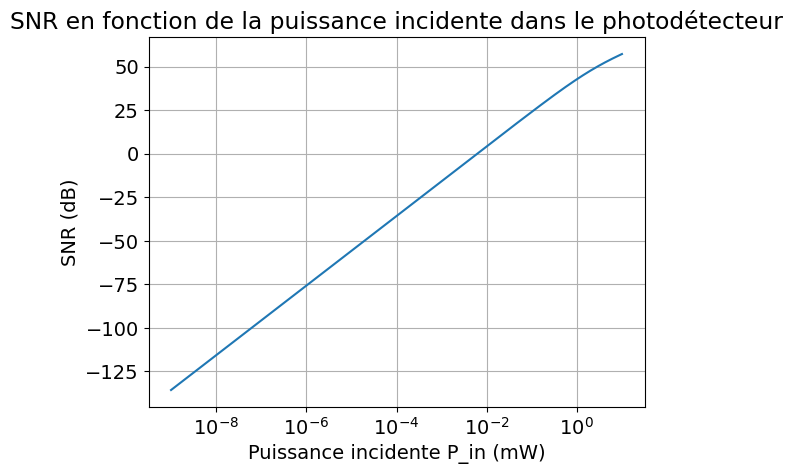

Puissance incidente dans le photodétecteur pour un SNR de 1 [linéaire]: 6090.007 nW
NEP du photodétecteur (sans pertes trou et interface): 44.555 pW/√Hz


In [34]:
input_power_NEP_num2 = np.linspace(1e-12, 10e-3, 1000000)  # W

photocurrent_NEP_num2 = calculate_photocurrent_from_ℜ(input_power_NEP_num2/ (T_hole * T_interface_air_pin), ℜ_num2)

SNR_NEP_num2 = calculate_SNR(photocurrent_NEP_num2, I_d_num2, frequency_B_num2, R_L_num2)
plt.plot(input_power_NEP_num2*1e3, 10 * np.log10(SNR_NEP_num2))
plt.xscale('log')
plt.title("SNR en fonction de la puissance incidente dans le photodétecteur")
plt.xlabel("Puissance incidente P_in (mW)")
plt.ylabel("SNR (dB)")
plt.grid()
plt.show()

input_power_for_1dB_SNR = input_power_NEP_num2[np.where(SNR_NEP_num2 >= 1)[0][0]]
print(f"Puissance incidente dans le photodétecteur pour un SNR de 1 [linéaire]: {input_power_for_1dB_SNR*1e9:.3f} nW")

NEP = input_power_for_1dB_SNR/np.sqrt(frequency_B_num2)

print(f"NEP du photodétecteur (sans pertes trou et interface): {NEP*1e12:.3f} pW/√Hz")


##### 2.C (5%) Proposez deux façons de modifier votre système afin d'augmenter le $SNR$. Justifiez avec des calculs.

Pour comparer avec les résultats précédents, nous allons utiliser la longueur de fibre trouvée en A) qui donnait un SNR de 10 dB.

In [35]:
def calculate_SNR_differennt_losses(P_input, α_fibre, L_fibre, T_interface_fiber_interstice, T_interface_interstice_pin, T_hole, η_i, η_abs, λ_0, I_d, B, R_L, print_results=True):
    """ Calcule le SNR pour différentes pertes dans la fibre """
    T_fiber = calculate_loss_fiber(α_fibre, L_fibre)
    Total_power_loss = T_fiber * T_interface_fiber_interstice * T_interface_interstice_pin * T_hole
    P_into_pin = P_input * Total_power_loss
    photocurrent = calculate_photocurrent(P_into_pin, η_i_num2, η_abs, λ_0)
    SNR = calculate_SNR(photocurrent, I_d, B, R_L)

    if print_results:
        print(f"Pour une fibre de {L_fibre:.3f} km:")
        print(f"  Transmission dans la fibre: {T_fiber*100:.3f} % = {lin_to_dB(T_fiber):.3f} dB")
        print(f"  Perte totale de puissance optique: {lin_to_dB(Total_power_loss):.3f} dB")
        print(f"  Puissance incidente dans le photodétecteur: {P_into_pin*1e3:.3f} mW")
        print(f"  Courant photocourant I_ph: {photocurrent*1e6:.3f} μA")
        print(f"  Rapport signal sur bruit SNR: {10 * np.log10(SNR):.3f} dB")
    return SNR

SRN_test = calculate_SNR_differennt_losses(P_input_fibre, α_fibre_num2, length_fibre_SNR_10dB, T_interface_fiber_air, T_interface_air_pin, T_hole, η_i_num2, η_abs_num2, λ_0_num2, I_d_num2, frequency_B_num2, R_L_num2)


Pour une fibre de 13.239 km:
  Transmission dans la fibre: 4.744 % = -13.239 dB
  Perte totale de puissance optique: -27.145 dB
  Puissance incidente dans le photodétecteur: 0.019 mW
  Courant photocourant I_ph: 7.898 μA
  Rapport signal sur bruit SNR: 10.000 dB


On pourrait simplement réduire les pertes dans le système. Une première option serait d'appliquer une couche antireflet (thin film TF) à l'interface du semiconducteur.  

Les couches antireflet à appliquer peuvent être calculées selon les formules suivantes. Le coefficient de réflexion sera nul si
$$ n_2 = \sqrt{n_1n_3} \quad\Bigg|\quad e = \frac{λ}{4n_2} $$
Ici, $n_1$ et $n_3$ représentent l'indice de réfraction du milieu : $n_1$ l'air et $n_3$ le SC $n_3 = 3.5$. $e$ est l'épaisseur de la couche mince a déposer à la surface de notre PD. Il y a toujours des petites pertes entre la fibre et l'air, mais plus entre l'air et la PD.


In [36]:
def calculate_epaisseur_TF(n_1, n_2, λ):
    """ Calcule l'épaisseur optimale d'une couche de traitement antireflet entre deux milieux d'indices n_1 et n_2 pour une longueur d'onde λ """
    n_TF = np.sqrt(n_1 * n_2)
    d_TF = λ / (4 * n_TF)
    return d_TF, n_TF

d_TF_num2, n_TF_num2 = calculate_epaisseur_TF(n_fiber_num2, n_interstice_num2, λ_0_num2)
print(f"Indice de réfraction optimal de la couche de traitement antireflet: {n_TF_num2:.3f}")
print(f"Épaisseur optimale de la couche de traitement antireflet: {d_TF_num2*1e9:.3f} nm")

T_interface_fibre_air = calculate_optical_transmission(n_fiber_num2, n_interstice_num2)
T_interface_air_pin = 1

SNR_TF = calculate_SNR_differennt_losses(P_input_fibre, α_fibre_num2, length_fibre_SNR_10dB, T_interface_fiber_air, T_interface_air_pin, T_hole, η_i_num2, η_abs_num2, λ_0_num2, I_d_num2, frequency_B_num2, R_L_num2)
print(f"\nUn augmentation de {10 * np.log10(SNR_TF/SRN_test):.3f} dB du SNR est obtenue grâce à la couche de traitement antireflet.")

Indice de réfraction optimal de la couche de traitement antireflet: 1.204
Épaisseur optimale de la couche de traitement antireflet: 186.852 nm
Pour une fibre de 13.239 km:
  Transmission dans la fibre: 4.744 % = -13.239 dB
  Perte totale de puissance optique: -25.542 dB
  Puissance incidente dans le photodétecteur: 0.028 mW
  Courant photocourant I_ph: 11.424 μA
  Rapport signal sur bruit SNR: 13.191 dB

Un augmentation de 3.191 dB du SNR est obtenue grâce à la couche de traitement antireflet.


Une deuxième option est de féruler directement la fibre optique sur notre PIN pour réduire les pertes liées au trou et à l'interface. Il est standard d'acheter des PD avec un embout de fibre collé directement sur le semi-conducteur. Cela peut réduire les pertes d'insertion et aider à l'alignement et la stabilité mécanique. Ici, je suppose que nous allons être intelligents et utiliser une colle optique faite pour cette utilité.
Je vais prendre la *OG603* avec un indice $n_{glue} = 1.5037$ et une transmitivité de $99\%$. 
Comme nous allons àcoller directement notre fibre sur le semi-conducteur. Il n'y aura pas de perte due au spot size et au trou de la cavité.


https://www.epotek.com/wp-content/uploads/2021/01/Selected-Application-Fiber-to-Ferrule-Bonding.pdf


In [37]:
n_glue = 1.5037

T_interface_fiber_glue = calculate_optical_transmission(n_fiber_num2, n_glue)
print(f"Transmission à l'interface fibre/colle: {T_interface_fiber_glue*100:.3f} % = {lin_to_dB(T_interface_fiber_glue):.3f} dB")

T_glue = 0.99
print(f"Transmission dans la colle: {T_glue*100:.3f} % = {lin_to_dB(T_glue):.3f} dB")



T_interface_glue_pin = calculate_optical_transmission(n_glue, n_pin_num2)
print(f"Transmission à l'interface colle/pin: {T_interface_glue_pin*100:.3f} % = {lin_to_dB(T_interface_glue_pin):.3f} dB")

T_hole_ferrulage = 1
print(f"Transmission power through the hole with ferrulage: {T_hole_ferrulage*100:.3f} % = {lin_to_dB(T_hole_ferrulage):.3f} dB")

SNR_ferrulage = calculate_SNR_differennt_losses(P_input_fibre, α_fibre_num2, length_fibre_SNR_10dB, T_interface_fiber_glue, T_interface_glue_pin * T_glue, T_hole_ferrulage, η_i_num2, η_abs_num2, λ_0_num2, I_d_num2, frequency_B_num2, R_L_num2)

print(f"\nUn augmentation de {10 * np.log10(SNR_ferrulage/SRN_test):.3f} dB du SNR est obtenue grâce au ferrulage.")

Transmission à l'interface fibre/colle: 99.967 % = -0.001 dB
Transmission dans la colle: 99.000 % = -0.044 dB
Transmission à l'interface colle/pin: 84.083 % = -0.753 dB
Transmission power through the hole with ferrulage: 100.000 % = 0.000 dB
Pour une fibre de 13.239 km:
  Transmission dans la fibre: 4.744 % = -13.239 dB
  Perte totale de puissance optique: -14.037 dB
  Puissance incidente dans le photodétecteur: 0.395 mW
  Courant photocourant I_ph: 161.545 μA
  Rapport signal sur bruit SNR: 35.618 dB

Un augmentation de 25.618 dB du SNR est obtenue grâce au ferrulage.


##### 2.D (5%) Considérez une modulation directe petit signal du laser de votre système, vous conservez tout mais êtes libre de choisir le courant injecté au laser. Quel courant DC appliquez-vous afin d'obtenir un $SNR \ge 10$?

Ici, on vient moduler, à petit signal, on peut facilement trouver la puissance optique avec l'efficacité de pente. En régime permanent avec un courant DC, la puissance est
$$ P = η_{slope} (I_{DC}-I_{th}) $$

Je vais choisir la même longueur de fibre que trouvée au numéro précédent. La puissance qui doit être injectée au début de la fibre optique doit être de $10 \rm{\ mW}$.
$$ I_{DC} = \frac{P}{η_{slope}} + I_{th} $$
Plus le courant DC est grand, plus la puissance sera grande, et plus le SNR sera grand.

In [38]:
I_DC_num2 = P_input_fibre / η_slope_num2 + I_th_num2

print(f"Courant continu I_DC minimum pour une puissance d'entrée de {P_input_fibre*1e3} mW: {I_DC_num2*1e3:.3f} mA")

Courant continu I_DC minimum pour une puissance d'entrée de 10.0 mW: 43.333 mA


##### 2.E (5%) Encore en modulation directe du laser, quelle est la profondeur de modulation maximale si vous devez être en mesure de différencier l'état "0" au récepteur du bruit d'obscurité?

Le courant de modulation $I_{ac}$ vient moduler en amplitude la puissance émise au laser. Quelle doit être la puissance minimale émise pour que le courant de la photodiode
 $I_{ph, min}  \ge I_d $

 Le courant pour une fréquence faible pour une modulation en cosinus pourrait ressembler à
 $$ I_{laser} = I_{DC}(1 - m\cos(ωt))$$
 La valeur minimum de courant sera de $I_{min} = I_{DC}(1-m) = I_{DC} + I_{AC}$

In [39]:
def calculate_laser_power_slow(I_DC, m, ω, t, I_th, η_slope):
    """ Calcule la puissance laser moyenne P_laser en fonction du courant continu I_DC et du courant alternatif I_AC """
    P_laser = η_slope * ((I_DC * (1 + m * np.cos(ω * t))) - I_th)
    if P_laser.min() < 0:
        P_laser[P_laser < 0] = 0
    return P_laser

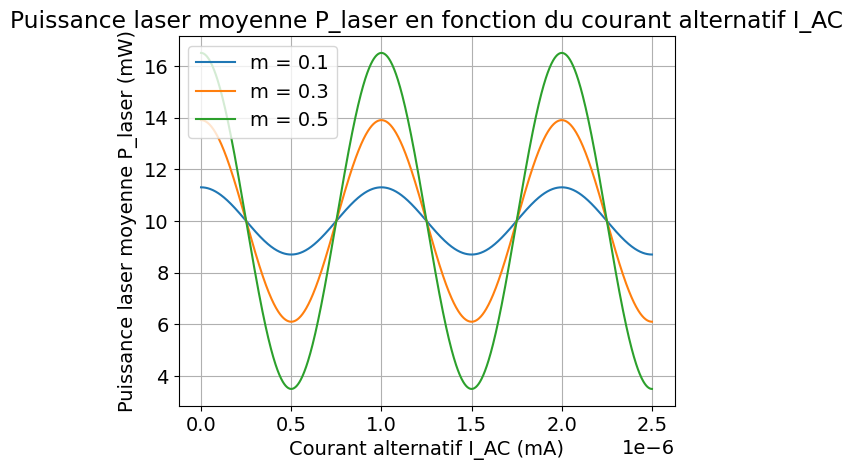

In [47]:
m_num2 = [0.1, 0.3, 0.5]
time_vector = np.linspace(0, 2.5e-6, 1000)



output_power_I_AC_num2 = []
for m in m_num2:
    output_power_I_AC_m_num2 = calculate_laser_power_slow(I_DC_num2, m, (2 * np.pi * 1e6), time_vector, I_th_num2, η_slope_num2)
    output_power_I_AC_num2.append(np.mean(output_power_I_AC_m_num2))

    plt.plot(time_vector, output_power_I_AC_m_num2*1e3, label=f'm = {m}')
plt.title("Puissance laser moyenne P_laser en fonction du courant alternatif I_AC")
plt.xlabel("Courant alternatif I_AC (mA)")
plt.ylabel("Puissance laser moyenne P_laser (mW)")
plt.legend()
plt.grid()
plt.show()

Maintenant prenons un sweep sur plusieurs $m$ au point minimum. Trouver le courant généré par la PIN pour chaque cas.


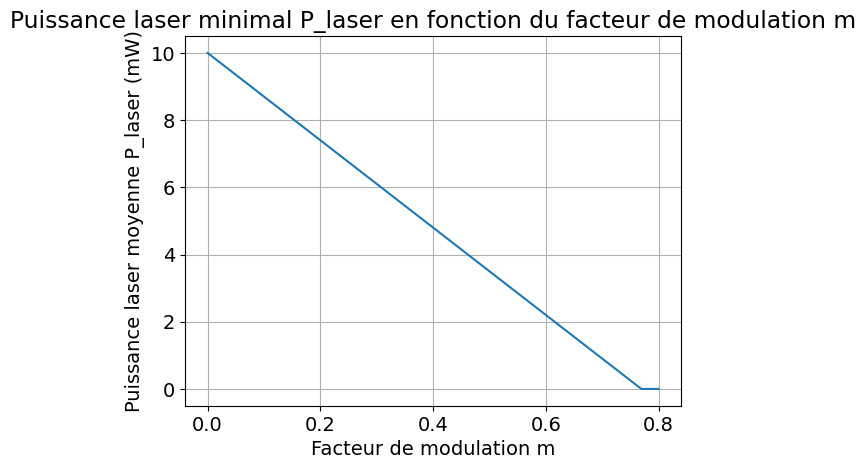

La longueur de la fibre est de 13.239 km.
La transmission dans la fibre est de 4.744 % = -13.239 dB.
La transmission à l'interface fibre/air est de 96.626 % = -0.149 dB.


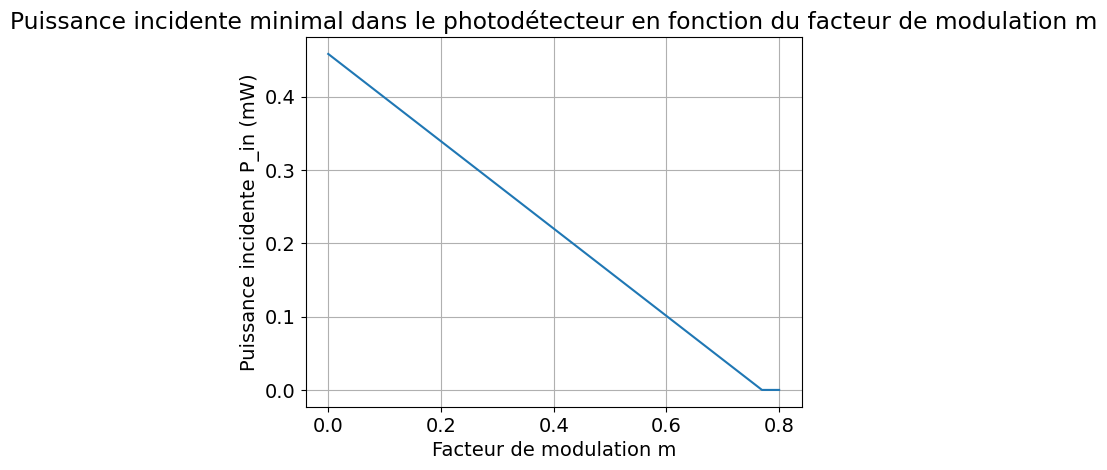

In [48]:
m_num2_E = np.linspace(0, 0.8, 10000)

output_power_I_AC_m_num2 = calculate_laser_power_slow(I_DC_num2, m_num2_E,(2 * np.pi * 1e6), 0.5e-6, I_th_num2, η_slope_num2)
plt.plot(m_num2_E, output_power_I_AC_m_num2*1e3)
plt.title("Puissance laser minimal P_laser en fonction du facteur de modulation m")
plt.xlabel("Facteur de modulation m")
plt.ylabel("Puissance laser moyenne P_laser (mW)")
plt.grid()
plt.show()


print(f"La longueur de la fibre est de {length_fibre_SNR_10dB:.3f} km.")
T_loss_fiber_E = calculate_loss_fiber(α_fibre_num2, length_fibre_SNR_10dB)
print(f"La transmission dans la fibre est de {T_loss_fiber_E*100:.3f} % = {lin_to_dB(T_loss_fiber_E):.3f} dB.")
print(f"La transmission à l'interface fibre/air est de {T_interface_fiber_air*100:.3f} % = {lin_to_dB(T_interface_fiber_air):.3f} dB.")

Input_power_PD_num2_E = output_power_I_AC_m_num2 * T_interface_fiber_air * T_loss_fiber_E
plt.plot(m_num2_E, Input_power_PD_num2_E*1e3)
plt.title("Puissance incidente minimal dans le photodétecteur en fonction du facteur de modulation m")
plt.xlabel("Facteur de modulation m")
plt.ylabel("Puissance incidente P_in (mW)")
plt.grid()
plt.show()

Le courant généré est alors


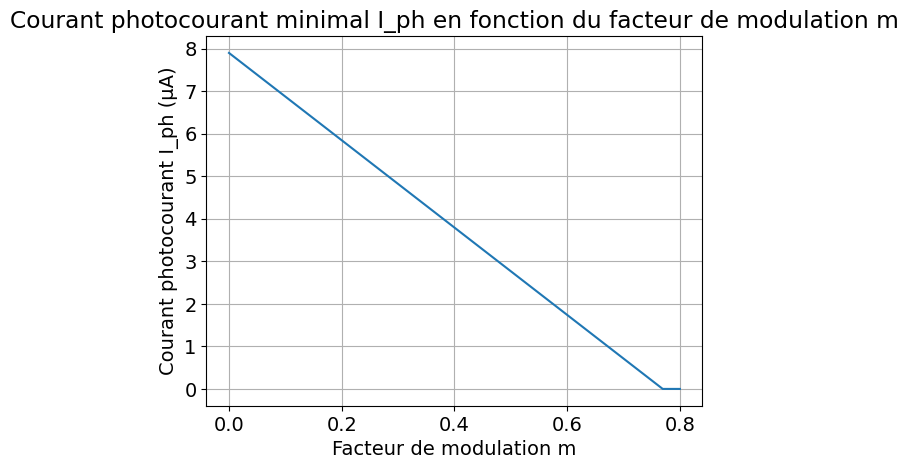

Le dark current du photodétecteur est de 2.000 nA.
Le facteur de modulation minimal pour que le photocourant soit
supérieur au dark current est de 0.76904.


In [49]:
photocurrent_E_num2 = calculate_photocurrent_from_R(Input_power_PD_num2_E, ℜ_num2)

plt.plot(m_num2_E, photocurrent_E_num2 * 1e6)
plt.title("Courant photocourant minimal I_ph en fonction du facteur de modulation m")
plt.xlabel("Facteur de modulation m")
plt.ylabel("Courant photocourant I_ph (μA)")
plt.grid()
plt.show()

print(f"Le dark current du photodétecteur est de {I_d_num2*1e9:.3f} nA.")

m_min_num2 = m_num2_E[np.where(photocurrent_E_num2 <= I_d_num2)[0][0]]
print(f"Le facteur de modulation minimal pour que le photocourant soit\nsupérieur au dark current est de {m_min_num2:.5f}.")


##### 2.F (5%) Proposez une façon d'augmenter la vitesse de modulation directe du laser tout en conservant les conditions de modulations énoncées en (D) et en (E). Justfiez avec un calcul.


**Les paramètres de la diode laser sont:**

- Courant de seuil: $I_{th} = 10$ mA
- Efficacité de pente: $\eta_{slope} = \frac{dP}{dI} = 0.3$ mW/mA
- Temps de vie des photons: $\tau_p = 10$ ps
- Temps de vie du au couplage (miroirs): $\tau_m = 10$ ps
- Volume du mode optique: $V_p = 1 \times 10^{-16}$ m $^3$
- Gain différentiel: $B = 1.5 \times 10^{-20}$ $m^{-1}$
- Indice de groupe: $n_g = 4$
- Longueur d'onde d'émission: $\lambda_0 = 900$ nm

Le facteur de confinement est défini selon le ratio du volume actif du laser et le volume du mode optique (Silicon Photonics Design
Lukas Chrostowski, page 298)
$$ Γ = \frac{V_{active}}{V_{p,mode}} $$

La fréquence de résonance du laser est définit selon l'équation 4.18.1 du Kasap

$$ f_r =   \frac{1}{2π\sqrt{τ_{charge} τ_{ph}}}\sqrt{\frac{I_{DC}}{I_{th}} - 1} 
$$ 
On pourrait réduire le temps de vie des photons en réduisant $τ_{m}$. On remarque que $τ_{ph} = τ_m$, alors il n'y a pas de perte intrinsèque au laser. Par contre $I_{th}$ augmentera car les pertes ne sont plus les mêmes. On pourrait aussi augmenter le volume active ce qui arrit pour effet d'augmenter $Γ$ (linéairement) ce qui diminurait $I_{th}$ (linéairement).

##### 2.G (5%) Pour les conditions trouvées en (D) et (E), quel est le photocourant généré par le photodétecteur à l'état "1"?

In [56]:
print(f"Avec min = {m_min_num2:.5f}, la puissance laser minimale est de {output_power_I_AC_m_num2[np.where(m_num2_E == m_min_num2)[0][0]]*1e3:.3f} mW.")

output_power_max_G = calculate_laser_power_slow(I_DC_num2, m_min_num2,(2 * np.pi * 1e6), 0, I_th_num2, η_slope_num2)

print(f"La longueur de la fibre est de {length_fibre_SNR_10dB:.3f} km.")

print(f"La transmission dans la fibre est de {T_loss_fiber_E*100:.3f} % = {lin_to_dB(T_loss_fiber_E):.3f} dB.")
print(f"La transmission à l'interface fibre/air est de {T_interface_fiber_air*100:.3f} % = {lin_to_dB(T_interface_fiber_air):.3f} dB.")

Input_power_PD_G = output_power_max_G * T_interface_fiber_air * T_loss_fiber_E

photocurrent_G = calculate_photocurrent_from_R(Input_power_PD_G, ℜ_num2)
print(f"La puissance laser maximale est de {output_power_max_G*1e3:.3f} mW.")
print(f"La puissance incidente dans le photodétecteur est de {Input_power_PD_G*1e3:.3f} mW.")
print(f"Le photocourant généré est de {photocurrent_G*1e6:.3f} μA.")
SNR_G = calculate_SNR(photocurrent_G, I_d_num2, frequency_B_num2, R_L_num2)
print(f"Le SNR obtenu est de {10 * np.log10(SNR_G):.3f} dB.")

Avec min = 0.76904, la puissance laser minimale est de 0.003 mW.
La longueur de la fibre est de 13.239 km.
La transmission dans la fibre est de 4.744 % = -13.239 dB.
La transmission à l'interface fibre/air est de 96.626 % = -0.149 dB.
La puissance laser maximale est de 19.997 mW.
La puissance incidente dans le photodétecteur est de 0.917 mW.
Le photocourant généré est de 15.793 μA.
Le SNR obtenu est de 15.986 dB.


##### 2.H (5%)Calculer la fréquence de résonance de la diode laser en modulation petit signal.

$$ f_r =   \frac{1}{2π\sqrt{τ_{charge} τ_{ph}}}\sqrt{\frac{I_{DC}}{I_{th}} - 1} 

In [60]:
def calculate_f_r(τ_charge, τ_ph, I_DC, I_th):
    """ Calcule la fréquence de relaxation f_r du laser """
    f_r = 1 / (2 * np.pi * np.sqrt(τ_charge * τ_ph)) * np.sqrt(I_DC / I_th - 1)
    return f_r

In [59]:
f_r_H = calculate_f_r(τ_m_num2, τ_p_num2, I_DC_num2, I_th_num2)
print(f"La fréquence de relaxation du laser est de {f_r_H*1e-9:.3f} GHz.")

La fréquence de relaxation du laser est de 29.058 GHz.


##### 2.I (5%) Identifiez l'élément limitant la vitesse d'opération de votre système. Justifiez avec un calcul.

Il s'agit surtout de la capacitance de notre Photodiode, c'est elle qui limite la fréquence maximal. La fréquence de coupure de notre PIN est de 
$$ f_c = \frac{1}{2πR_LC} 
$$

$$ C_j = \frac{ϵ_0ϵ_r A_{détecteur}}{W_i} $$

$$ f_r =   \frac{1}{2π\sqrt{τ_{charge} τ_{ph}}}\sqrt{\frac{I_{DC}}{I_{th}} - 1} 

In [68]:
print(f"La fréquence de courpure de notre photodétecteur est de {frequency_B_num2*1e-9:.3f} GHz.")
print(f"La fréquence de relaxation du laser est de {f_r_H*1e-9:.3f} GHz.")
print(f"La fréquence de relaxation du laser est inférieure à la fréquence de coupure \ndu photodétecteur, donc le système est limité par le laser.")


La fréquence de courpure de notre photodétecteur est de 18.683 GHz.
La fréquence de relaxation du laser est de 29.058 GHz.
La fréquence de relaxation du laser est inférieure à la fréquence de coupure 
du photodétecteur, donc le système est limité par le laser.


Il serait facile de vouloir augmenter la résistance de charge. Toutefois, il est standard d'utiliser une impédance électrique de $50Ω$. Si une valeur différente est utilisée, des réflexions RF viendront atténuer notre signal. C'est tout de même une solution qui pourrait être envisagée. Aussi, il serait avantageux de diminuer la surface de notre récepteur. Si un bon ferrulage a été effectué, la surface de semiconducteur nécessaire pour la détection pourrait être grandement diminuée. Il serait ainsi possible de réduire la capacitance de notre PIN.